In [270]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
import ipywidgets as widgets
from itertools import cycle

In [550]:
theme ="Energy, Ecosystems, and Humans"
t=1.0
max_sub = 5
depth = 3
synonyms= 0
branching = 'random'

In [551]:
bertopic_results = pd.read_csv(f"bertopic_results/results_all_methods_{theme}_hierarchy_t{t}_maxsub{max_sub}_depth{depth}_synonyms{synonyms}_{branching}.csv")
bertopic_results['reduction_method'] = bertopic_results['reduction_method'].fillna("None")

In [552]:
score_numbers = bertopic_results['level'].unique()


In [576]:
score = 'FM'

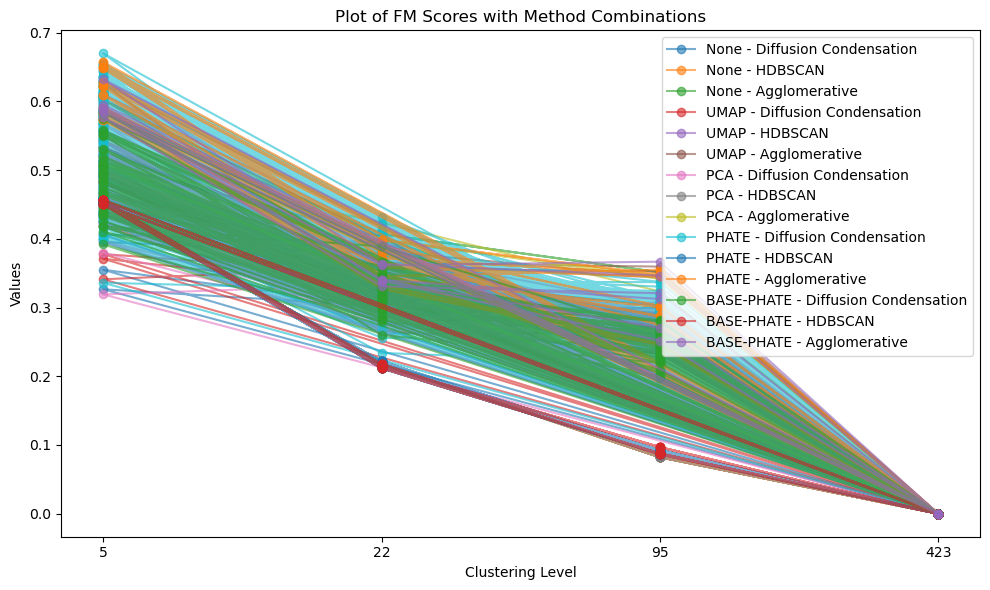

In [577]:
# Plot each row as a connected line (excluding the last {score} column)
plt.figure(figsize=(10, 6))
# Loop through each method combination in bertopic_results and plot separately
for method in bertopic_results['reduction_method'].unique():
    for cluster_method in bertopic_results['cluster_method'].unique():
        subset = bertopic_results[(bertopic_results['reduction_method'] == method) & 
                                  (bertopic_results['cluster_method'] == cluster_method)]
        if not subset.empty:
            plt.plot(subset['level'][:-1].astype(str), subset[f'{score}'][:-1], marker='o', alpha=0.6, label=f'{method} - {cluster_method}')

# Set axis labels and title
plt.xlabel('Clustering Level')
plt.ylabel('Values')
plt.title(f'Plot of {score} Scores with Method Combinations')
plt.legend()
plt.tight_layout()
os.makedirs(f'{score}_Comparison_result_plots', exist_ok=True)

fig_file  =f'{score}_Comparison_result_plots/plot_{theme}_hierarchy_t{t}_maxsub{max_sub}_depth{depth}.png'

plt.savefig(fig_file)
plt.show()




In [578]:
# df_results = bertopic_results.pivot_table(index=['reduction_method', 'cluster_method'], 
#                                 columns='level', 
#                                 values=[f'{score}'], 
#                                 aggfunc='max')

# # Reset the columns and index
# df_results.columns = [f'{col[0]}_level_{col[1]}' for col in df_results.columns]
# df_results.reset_index(inplace=True)
# table_file  =f'FM_Comparison_result_tables/{score}_Comparison_{theme}_hierarchy_t{t}_maxsub{max_sub}_depth{depth}.csv'
# df_results.to_csv(table_file)

In [579]:

bertopic_results[f'mean_{score}'] = bertopic_results.groupby(['reduction_method', 'cluster_method', 'reduction_params', 'cluster_params'])[f'{score}'].transform('mean')
group_cols = ['reduction_method', 'cluster_method', 'reduction_params', 'cluster_params']
max_mean_score = bertopic_results.groupby(group_cols)[f'mean_{score}'].transform('max')
max_entries = bertopic_results[bertopic_results[f'mean_{score}'] == max_mean_score]

# Further reduce by grouping over ['reduction_method', 'cluster_method']
final_max_score = max_entries.groupby(['reduction_method', 'cluster_method'])[f'mean_{score}'].transform('max')
final_entries = max_entries[max_entries[f'mean_{score}'] == final_max_score]

# Pivot the final reduced dataset
best_results = final_entries.pivot_table(
    index=['reduction_method', 'cluster_method'], 
    columns='level', 
    values=[f'{score}'], 
    aggfunc='max'
)
best_results.columns = [f'{col[0]}_level_{col[1]}' for col in best_results.columns]
best_results.reset_index(inplace=True)
bk_columns = [col for col in best_results.columns if col.startswith(f'{score}_level')]


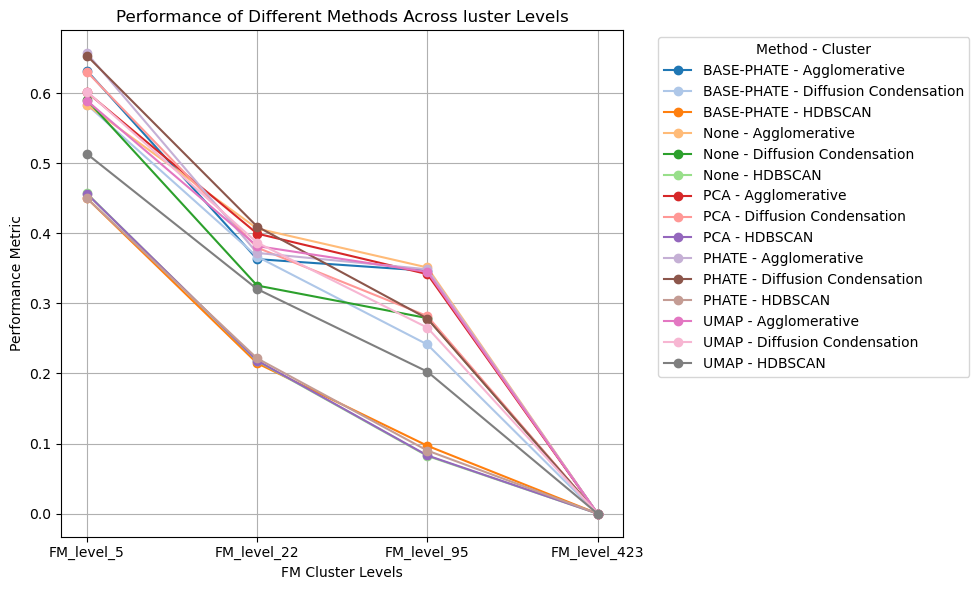

In [580]:

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each method's performance across BK levels
colors = cycle(plt.cm.tab20.colors)  # This creates a color cycle from tab10 colormap

for method in best_results['reduction_method'].unique():
    for cluster in best_results['cluster_method'].unique():
        # Filter the DataFrame for the current method and cluster
        subset = best_results[(best_results['reduction_method'] == method) & (best_results['cluster_method'] == cluster)]
        if not subset.empty:
            # Extract the performance metrics for the BK columns
            performance = subset[bk_columns].values.flatten()
            # Plot the line with a unique color from the cycle
            plt.plot(bk_columns, performance, marker='o', label=f'{method} - {cluster}', color=next(colors))

# Add labels and title
plt.xlabel(f'{score} Cluster Levels')
plt.ylabel('Performance Metric')
plt.title('Performance of Different Methods Across luster Levels')
plt.legend(title='Method - Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Dropdown(description='Level:', options=(5, 22, 95, 423), value=5)

Button(description='Update Plot', style=ButtonStyle())

/var/folders/3z/trrz86kd2jjf4smrjx86v6k80000gp/T/ipykernel_30132/2967220778.py:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=bertopic_data, x='Method', y='Score', hue='Method', palette=colors, legend=True)
/var/folders/3z/trrz86kd2jjf4smrjx86v6k80000gp/T/ipykernel_30132/2967220778.py:20: UserWarning: The palette list has more values (20) than needed (15), which may not be intended.
  sns.boxplot(data=bertopic_data, x='Method', y='Score', hue='Method', palette=colors, legend=True)


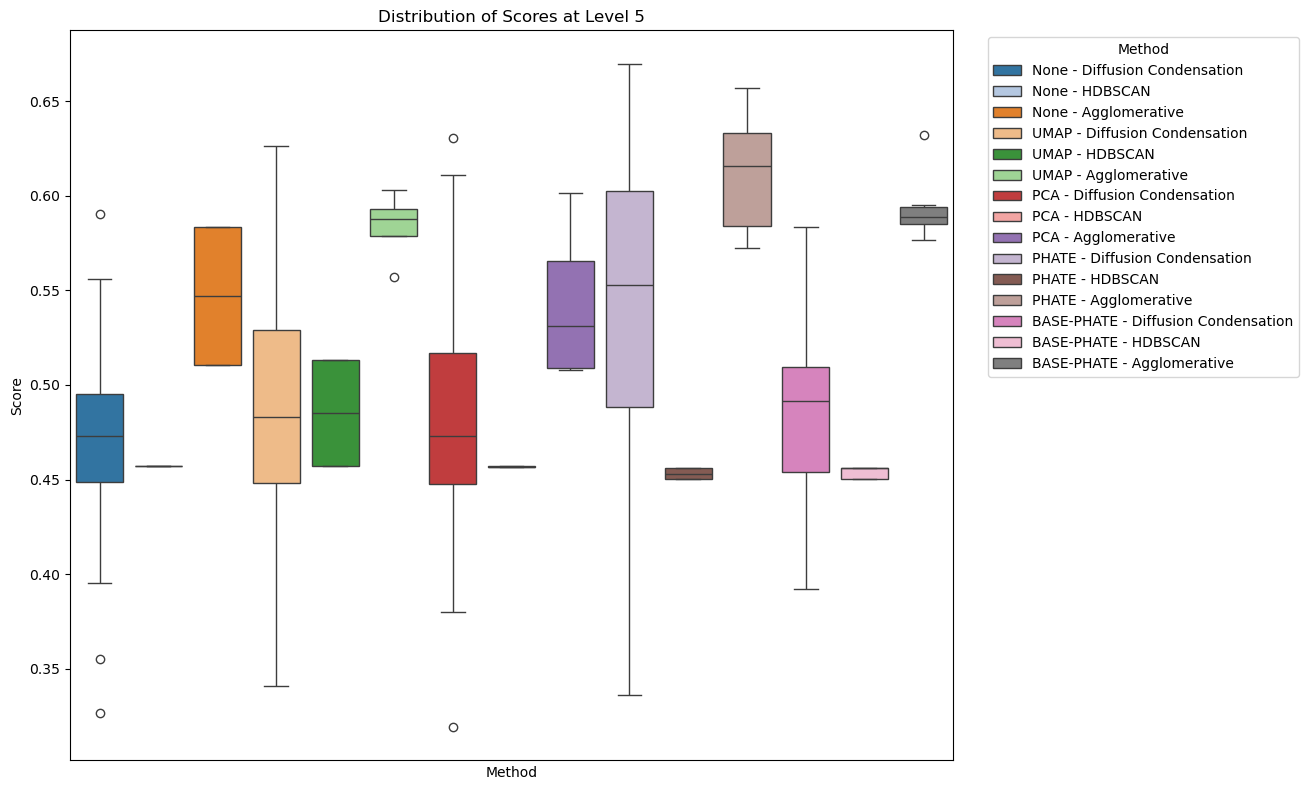

/var/folders/3z/trrz86kd2jjf4smrjx86v6k80000gp/T/ipykernel_30132/2967220778.py:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=bertopic_data, x='Method', y='Score', hue='Method', palette=colors, legend=True)
/var/folders/3z/trrz86kd2jjf4smrjx86v6k80000gp/T/ipykernel_30132/2967220778.py:20: UserWarning: The palette list has more values (20) than needed (15), which may not be intended.
  sns.boxplot(data=bertopic_data, x='Method', y='Score', hue='Method', palette=colors, legend=True)


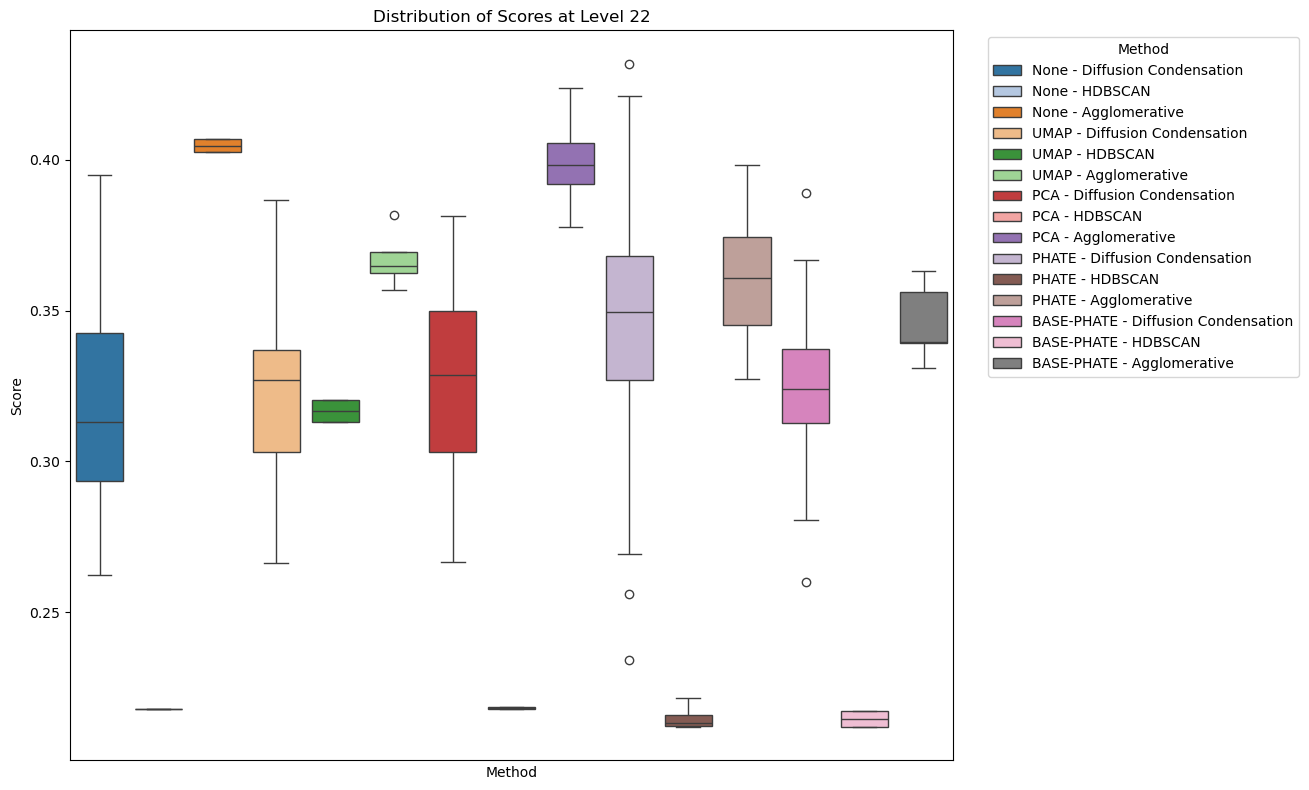

/var/folders/3z/trrz86kd2jjf4smrjx86v6k80000gp/T/ipykernel_30132/2967220778.py:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(data=bertopic_data, x='Method', y='Score', hue='Method', palette=colors, legend=True)
/var/folders/3z/trrz86kd2jjf4smrjx86v6k80000gp/T/ipykernel_30132/2967220778.py:20: UserWarning: The palette list has more values (20) than needed (15), which may not be intended.
  sns.boxplot(data=bertopic_data, x='Method', y='Score', hue='Method', palette=colors, legend=True)


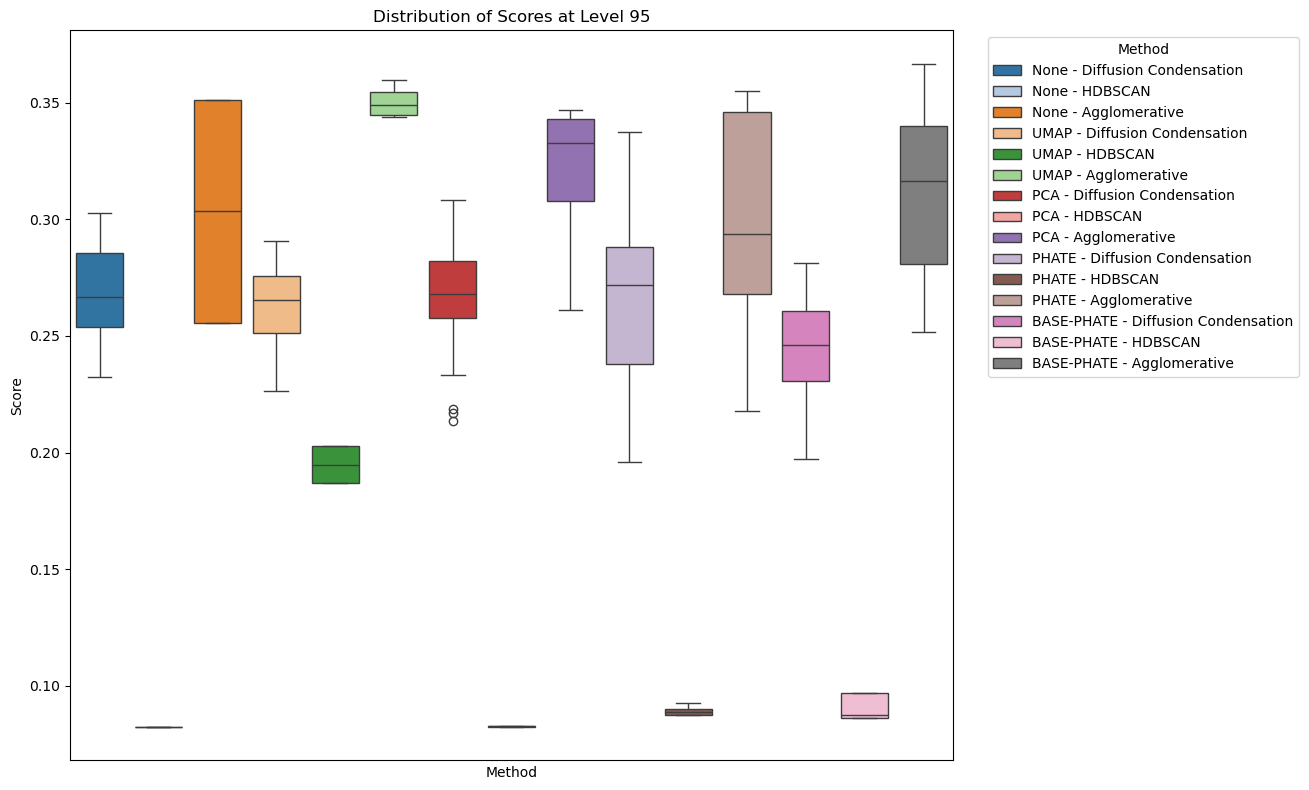

In [581]:

def update_plot(level):
    plt.figure(figsize=(14, 8))

    valid_subplots = 0  # Reset valid subplot counter
    # Filter the bertopic results for the selected level
    bertopic_subset = bertopic_results[bertopic_results['level'] == level]
    # Create a new column for plotting, combining bertopic and phate data
    bertopic_subset = bertopic_subset[['reduction_method', 'cluster_method', f'{score}']].dropna()
    bertopic_subset['Method'] = bertopic_subset['reduction_method'] + ' - ' + bertopic_subset['cluster_method']
    # Concatenate the two DataFrames for comparison
    bertopic_data = bertopic_subset[['Method', f'{score}']].rename(columns={f'{score}': 'Score'})

    # Skip plotting if more than 50% NaNs
    if bertopic_data['Score'].isna().sum() / len(bertopic_data) > 0.5:
        return

    valid_subplots += 1
    plt.subplot(1, valid_subplots, valid_subplots)
    colors = plt.cm.tab20(np.linspace(0, 1, 20))
    sns.boxplot(data=bertopic_data, x='Method', y='Score', hue='Method', palette=colors, legend=True)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), title='Method')
    plt.title(f'Distribution of Scores at Level {level}')
    plt.xticks([])
    plt.tight_layout()
    plt.show()

level_dropdown = widgets.Dropdown(
    options=bertopic_results['level'].unique(),
    description='Level:',
    value=score_numbers[0],  # Set the default value
)

update_button = widgets.Button(description="Update Plot")

def on_button_click(b):
    update_plot(level_dropdown.value)

update_button.on_click(on_button_click)

display(level_dropdown, update_button)

update_plot(level_dropdown.value)